<a href="https://colab.research.google.com/github/francji1/01ZLMA/blob/main/code/01ZLMA_ex05_GLM_Model_Diagnostics_final_Student_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01ZLMA - Exercise 05

Exercise 05 of the course 01ZLMA.

# Model Diagnostics - Post-hoc analysis of glm

How to check if our GLM is sufficient and how to do it in Python/ R




## Dataset trees

The volume y (in cubic feet) of 31 black cherry trees (střemcha pozdní) was measured as well as the height (in feet) and the girth, or diameter,
at breast height (in inches). The volume of the tree is related to the volume of timber, which is important economically.

More information can be find in Chapter 8: Generalized Linear Models: Diagnostics (Peter K. Dunn and Gordon K. Smyth, Generalized Linear Models With Examples in R)


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import scipy.stats as stats





In [ ]:
# Load the R magic extension
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R -o trees
trees

   Girth Height Volume
1    8.3     70   10.3
2    8.6     65   10.3
3    8.8     63   10.2
4   10.5     72   16.4
5   10.7     81   18.8
6   10.8     83   19.7
7   11.0     66   15.6
8   11.0     75   18.2
9   11.1     80   22.6
10  11.2     75   19.9
11  11.3     79   24.2
12  11.4     76   21.0
13  11.4     76   21.4
14  11.7     69   21.3
15  12.0     75   19.1
16  12.9     74   22.2
17  12.9     85   33.8
18  13.3     86   27.4
19  13.7     71   25.7
20  13.8     64   24.9
21  14.0     78   34.5
22  14.2     80   31.7
23  14.5     74   36.3
24  16.0     72   38.3
25  16.3     77   42.6
26  17.3     81   55.4
27  17.5     82   55.7
28  17.9     80   58.3
29  18.0     80   51.5
30  18.0     80   51.0
31  20.6     87   77.0


In [ ]:
%%R
library(tidyverse)
#library(ggplot2)

#install.packages("GLMsData")
#library(GLMsData)

#install.packages("GGally")
#library(GGally)

install.packages("statmod")
library(statmod)

install.packages("boot")
library(boot)

install.packages("gridExtra")
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/statmod_1.5.0.tar.gz'
Content type 'application/x-gzip' length 92486 bytes (90 KB)
downloaded 90 KB


The downloaded source packages are in
	‘/tmp/RtmpevFPGb/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/boot_1.3-31.tar.gz'
Content type 'application/x-gzip' length 238458 bytes (232 KB)
downloaded 232 KB


The downloaded source packages are in
	‘/tmp/RtmpevFPGb/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'
Content type 'application/x-gzip' length 1062844 bytes (1.0 MB)
downloaded 1.0 MB


The downloaded source packages are in
	‘/tmp/RtmpevFPGb/downloaded_packages’

Attaching package: ‘gridExtra’

The following object is masked f

In [ ]:
## tree dataset from rdatasets package
# !pip install rdatasets
# import rdatasets
# trees = rdatasets.data("trees")
# trees

In [ ]:
trees.describe()

NameError: name 'trees' is not defined

In [ ]:
# basic graphs of dataset
g = sns.PairGrid(trees)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

The relationships between the tree volume and height, and tree volume and girth, both appear non-linear.

In [ ]:
log_trees = trees.copy()
log_trees['log_Girth'] = np.log(trees['Girth'])
log_trees['log_Height'] = np.log(trees['Height'])
log_trees['log_Volume'] = np.log(trees['Volume'])
log_trees.head()

In [ ]:
h = sns.PairGrid(log_trees)
h.map_diag(sns.histplot)
h.map_offdiag(sns.scatterplot)
h.add_legend()

In [ ]:
trans_trees = trees.copy()
trans_trees['cone'] = (np.pi*(trees['Girth']/12)**2*trees['Height'])/12
trans_trees['cylinder'] = (np.pi*(trees['Girth']/12)**2*trees['Height'])/4
trans_trees.head()

In [ ]:
i = sns.PairGrid(trans_trees)
i.map_diag(sns.histplot)
i.map_offdiag(sns.scatterplot)

## Classical Regression analysis approach
How we did it last term in 01RAD

### Model 0 lm()

In [ ]:
trees_m0a = smf.ols(formula='log_Volume ~ log_Girth + log_Height', data=log_trees).fit()
print(trees_m0a.summary())


If we understand given problem, we can find good linear relation with some advanced transformation of independent varialbes.

In [ ]:
trees_m0b = smf.ols(formula='Volume ~ cone - 1', data=trans_trees).fit()
print(trees_m0b.summary())

In [ ]:
trees_m0c = smf.ols(formula='Volume ~ cylinder - 1', data=trans_trees).fit()
print(trees_m0c.summary())

## GLM approach
Since response is continuous nonnegative variable, we use `family = gamma`. In the first approach we try canonical link function, which is for gamma distribution: $g(\mu) = 1/\mu$.

### Model 1 (_m1)

In [ ]:
trees_m1 = smf.glm('Volume ~  Girth + Height',
                  data=trees,
                  family=sm.families.Gamma()
                  ).fit()
print(trees_m1.summary())

https://www.statsmodels.org/stable/glm.html

In [ ]:
trees_m1 = smf.glm('Volume ~ Girth + Height',
                  data=trees,
                  family=sm.families.Gamma(link=sm.families.links.InversePower())
                  ).fit()
print(trees_m1.summary())

 $R^2$ CS by Cox and Snell
https://en.wikipedia.org/wiki/Pseudo-R-squared
$$R_{\text{CS}}^{2}=1-\left({\frac {L_{0}}{L_{M}}}\right)^{2/n}=1-e^{2(\ln(L_{0})-\ln(L_{M}))/n}$$


Cox & Snell’s pseudo-R-squared: 1 - exp((llnull - llf)*(2/nobs))

 $R^2$ by  McFadden’s
 $$ R_{\text{McF}} =  1 - \frac{L_{M}}{L_{0}}$$


by statsmodel
https://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLMResults.pseudo_rsquared.html

**Remark**: If estimated two different models, they can have different dispersion !!!

In [ ]:
R2_CS_sm = trees_m1.pseudo_rsquared(kind='cs')
R2_McF_sm = trees_m1.pseudo_rsquared(kind='mcf')

In [ ]:
# Fit the null model (model with only an intercept)
null_formula = 'Volume ~ 1'
null_model = smf.glm(formula=null_formula, data=trees, family=sm.families.Gamma()).fit()

# log-Likelihood of the null model (L0)
L0 = null_model.llf
dispersion_0 = null_model.scale
print(f'Dispersion of m0: {dispersion_0}')

# log-Likelihood of the null model (L0) from the estimated model with same dispersion
L0 = trees_m1.llnull

# log-Likelihood of the fitted model (LM)
LM = trees_m1.llf

# Number of observations (n)
n = trees.shape[0]

# Compute Cox and Snell pseudo R-squared
R2_CS = 1 - (np.exp((L0 - LM)*(2/n)))
R2_CS_exact = 1 - np.exp((trees_m1.deviance - trees_m1.null_deviance)/trees_m1.nobs)

dispersion = trees_m1.scale
# Cox & Snell exact adjusted (identical to statsmodels):
R2_CS_exact_adj = 1 - np.exp(( (trees_m1.deviance - trees_m1.null_deviance) / dispersion ) / trees_m1.nobs)

print(f'Dispersion of m1: {dispersion}')


print(f'Cox and Snell pseudo R-squared likelihood: {R2_CS}')
print(f'Cox and Snell pseudo R-squared deviance: {R2_CS_exact}')
print(f'Cox and Snell pseudo R-squared deviance adjusted: {R2_CS_exact_adj}')

print(f'Cox and Snell pseudo R-squared by statsmodels: {R2_CS_sm}')




# Compute McFadden’s pseudo R-squared
R2_McF = 1 - (LM/L0)
R2_McF_exact = 1 - (trees_m1.deviance / trees_m1.null_deviance)
# McFadden exact adjusted (identical to statsmodels):
R2_McF_exact_adj = 1 - ( (trees_m1.deviance / dispersion) / (trees_m1.null_deviance / dispersion) )
print(f'McFadden’s pseudo R-squared likelihood: {R2_McF}')
print(f'McFadden’s pseudo R-squared deviance: {R2_McF_exact}')
print(f'McFadden’s pseudo R-squared deviance adjusted: {R2_McF_exact_adj}')
print(f'McFadden’s pseudo R-squared by statsmodels: {R2_McF_sm}')

**Pearson chi-squared statistic**

$$ \chi^2 = \sum_{i=1}^n ({r_{i}^{P})^2
=\frac{(y_{i}-\hat{\mu}_{i})^2}{v(\hat\mu_i)}},\qquad
v(\mu_i)= b^{\prime\prime}(\theta_i) \mbox{ for } \theta_i = \theta(\mu_i),
$$

In [ ]:
# Calculate the expected values (fitted values)
E = trees_m1.fittedvalues

# Calculate the observed values
O = trees['Volume']

# For a Gamma distribution the variance function is V(mu) = mu^2
V_E = E**2

# Calculate the Pearson residuals
r_Pearson = (O - E) / np.sqrt(V_E)

# Calculate the Pearson chi-squared statistic
pearson_chi2 = np.sum(r_Pearson**2)

print(f'Pearson chi-squared statistic: {pearson_chi2}')

### Questions:

* What can you say from the `summary()` about the model 0?
* Do you understand to all numbers and do you know how they were computed?

The general formula for deviance:

$$ D = 2  (l_{sat} - l_{model}) $$

where $l_{sat}$ is the log-likelihood of the saturated model and $l_{model}$ is the log-likelihood of the fitted model.

### Step 1: Log-likelihood for Gamma Distribution

For a single observation, the log-likelihood function of the Gamma distribution with the shape parameter $\theta$ and scale parameter $\beta$ is given by:

$$Y \sim \Gamma (a,p) \Rightarrow \theta = \frac{-a}{p}, \phi = \frac{1}{p}, b = -log (-\theta) ⇒ E[Y] = b'(\theta)  = -\frac{1}{\theta} = \frac{p}{a}, \text{where $\theta$ is canonical parameter}  $$
We have canonical link function (the inverse link)
$$\eta_i = g(\mu_i) = \frac{1}{\mu_i} = \theta_i ⇒ g = (b')^{-1}$$

$$l(y; \theta, \beta) = \frac{1}{ϕ}\left( \sum_{i=1}^{n} \left( y_i \theta_i - b(\theta_i) \right) \right) + C $$
For saturated model:
$$ \hat{\theta}_i^{sat} = (b')^{-1}(y_i) = \frac{1}{y_i} \  and \ \hat{\mu_i} = y_i$$



Lets assume that the shape parameter is fixed and we are dealing with the mean $\mu$ only.


$$ D = \frac{2}{ϕ} \left( \sum_{i=1}^{n} \left( y_i (\hat{\theta}_i^{sat} - \hat{\theta}_i^{model}) - (b(\hat{\theta}_i^{sat}) - b(\hat{\theta}_i^{model})) \right) \right)$$


$$ D = 2 \left( \sum_{i=1}^{n} \left( \frac{y_i - \hat{y}_i}{\hat{y}_i} - \log\frac{y_i}{\hat{y}_i} \right) \right)$$



In [ ]:

# Fitting the model as specified
trees_m1 = smf.glm('Volume ~  Girth + Height', data=trees, family=sm.families.Gamma()).fit()

# Printing the summary
print(trees_m1.summary())

# Calculating the deviance manually
y_hat = trees_m1.predict()
y = trees_m1.model.endog

deviance_hand = 2 * np.sum((y - y_hat) / y_hat  - np.log(y / y_hat))

# Comparing with statsmodels deviance
deviance_statsmodels = trees_m1.deviance

print(deviance_statsmodels)
print(deviance_hand)


### Tasks

* Compute different types of residuals.
* Plot residuals vs. fitted values or regressors
* Validate used ling function with working responses.
* Validate used regressors with Component+Residual, ie Partial Residual Plots

# Residuals in GLM and LM Comparison
$$\hat\beta = (X^T \hat{W} X)^{-1}(X^T \hat{W} \hat{Z})$$
where
$$ \hat{W} = diag(\frac{1}{V(\hat{\mu})(g'(\hat{\mu}))^2}) $$
$$\hat{Z}_i = x_i^T \hat{\beta} + (y_i - \hat{\mu_i}) g'(\hat{\mu_i})$$
$$\hat{\mu_i} = g^{-1}(x_i^T \hat{\beta}) $$

Lets denote:
$$ X^* = X^T \hat{W}^{\frac{1}{2}} $$
$$ Y^* = \hat{W}^{\frac{1}{2}} \hat{Z} $$

than $\hat{Y^*} = X^* \hat{\beta} = H^* Y^*$, where $H^* = \hat{W}^{1/2} X (X^T \hat{W} X)^{-1} X^T \hat{W}^{1/2})$ is hat matrix



## Residuals
Consider  the GLM from for the observations $Y_1,\ldots,Y_n$ and assume $a_i(\phi) = a_i \phi$, where $a_i>0$ are known for $i=1,\ldots, n$.



From estimation of GLMs as Locally Like Linear Regression by using IRLS we can obtain weights $W$ with  *working responses* and compute *working residuals*.

**Working residuals**
$$e_i = z_i − \hat{\eta_i} = (y_i - \hat{\mu}_i)g'(\hat{\mu}_i) $$

**Pearson residuals**

$$ {r_{i}^{P}
=\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{a_i\, v(\hat\mu_i)}}},\qquad
v(\mu_i)= b^{\prime\prime}(\theta_i) \mbox{ for } \theta_i = \theta(\mu_i),
$$

where $v(\mu_i)$ is called a variance function and $V[Y_i] = a_i \phi v(\mu_i)$.
The Pearson residual is the response residual scaled with with the estimated standard deviation for the observation.


**Pearson standartized residuals**

$$
{r_{i}^{PS}
=}\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{\hat{V}[Y_{i}](1-h_{ii})}}
=\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{a_i \hat\phi \, v(\hat\mu_i)(1-h_{ii})}}
={\frac{r_{i}^{P}}{\sqrt{\hat\phi(1-h_{ii})}}},
$$

**Anscombe residuals**

For models, where $a_i(\phi)=1$
$$
{r_{i}^{A}=\frac{A(y_{i})-A(\hat{\mu}_{i})}{\sqrt{\hat{V}[A(y_{i})]}}},\quad i=1,...,n
$$
where
$$
A(y)=\int_{-\infty}^{y}\frac{d\mu}{v^{1/3}(\mu)}.
$$

**Deviance residual**
* They measure how much each observation contributes to the model’s deviance.
* The deviance residual for the i’th observation is defined as

$$
{r_{i}^{D}=\mbox{sign} (y_{i}-\hat{\mu}_{i})\sqrt{D_{i}}},\quad i=1,...,n,
$$
where
$$
D=\sum_{i=1}^{n}(r_{i}^{D})^{2} = \sum_{i=1}^{n}D_{i}=
\sum_{i=1}^{n}\frac{2}{a_{i}}\left[y_{i}(\tilde{\theta}_{i}-
\hat{\theta}_{i})-\left(b(\tilde{\theta}_{i})-b(\hat{\theta}_{i})\right)\right].
$$


**Deviance standartized residual**
$$
{r_{i}^{DS}=\frac{r_{i}^{D}}{\sqrt{\hat\phi(1-h_{ii})}}},\quad i=1,...,n,
$$

The deviance residuals are the generalization of the residuals from the classical linear model. They are constructed using the analogy between the deviance and the RSS.

Gamma model is necessarily heteroskedastic, because the variance is  proportional to $μ^2$.

In [ ]:
# Residuals
observed = trees_m1.model.endog
estimates = trees_m1.fittedvalues
v = estimates**2 # for gamma distribution used in our model with trees dataset
# If we have Poisson distribution, v = estimates, Bernouli v = estimates(1-estimates), ....

In [ ]:
# Response residuals
r_response1 = trees_m1.resid_response
r_response2 = observed - estimates
df = pd.DataFrame(r_response1)
df['r_response2'] = r_response2
df.head()

In [ ]:
# Working residuals
r_working1 = trees_m1.resid_working
r_working2 = (observed - estimates) / v
df['r_working1'] = r_working1
df['r_working2'] = r_working2
df.head()

**Task**: Show, why `r_working1 = - r_working2`

In [ ]:
# Pearson residuals
r_pearson1 = trees_m1.resid_pearson # Pearson residuals from resid() function
r_pearson2 = (observed - estimates) / np.sqrt(v)    # Pearson residuals from above definitionf for gamma
df['r_pearson1'] = r_pearson1
df['r_pearson2'] = r_pearson2
df.head()

In [ ]:
def compute_residuals(model):
    # Assumed inputs and preliminary calculations
    Y_obs = model.model.endog
    mu_hat = model.fittedvalues
    phi_hat = model.scale
    var_weights = model.model.var_weights if model.model.var_weights is not None else np.ones_like(Y_obs)
    V = model.family.variance(mu_hat)

    # Compute leverage values
    influence = model.get_influence(observed=False)  # Adjust as necessary for your model
    h_ii = influence.hat_matrix_diag  # Leverage values

    # Working Residuals
    working_residuals = model.resid_working

    # Pearson Residuals
    pearson_residuals = (Y_obs - mu_hat) / np.sqrt(var_weights * V)

    # Pearson Standardized Residuals
    pearson_standardized_residuals = pearson_residuals / np.sqrt(phi_hat * (1 - h_ii))

    # Deviance Residuals
    deviance_residuals = model.resid_deviance

    # Deviance Standardized Residuals
    deviance_standardized_residuals = deviance_residuals / np.sqrt(phi_hat * (1 - h_ii))

    # Compile into a DataFrame
    residuals_df = pd.DataFrame({
        "Original_Values": Y_obs,
        "Predicted_Values": mu_hat,
        "Working_Residuals": working_residuals,
        "Pearson_Residuals": pearson_residuals,
        "Pearson_Standardized_Residuals": pearson_standardized_residuals,
        "Deviance_Residuals": deviance_residuals,
        "Deviance_Standardized_Residuals": deviance_standardized_residuals
    })

    return residuals_df



In [ ]:
residuals_df = compute_residuals(trees_m1)
residuals_df.head()

In [ ]:
trees_modeled = trees.copy()

In [ ]:
!pip install plotnine

In [ ]:
from plotnine import ggplot, aes, geom_line, geom_smooth, geom_abline, geom_point, labs, geom_qq_line, geom_qq
%matplotlib inline

In [ ]:
trees['fitted'] = trees_m1.fittedvalues

In [ ]:
ggplot(trees, aes(x = 'Volume', y = 'fitted')) + \
      geom_smooth()+ \
      geom_point() + \
      geom_abline(intercept = 0, slope = 1)

In [ ]:
%%R -o trees_modeled
library("tidyverse")
trees_m1 <- glm( Volume ~ Girth + Height, data=trees, family=Gamma)
summary(trees_m1)

expected  <- trees_m1$y
estimates <- trees_m1$fitted.values
v         <- estimates^2 # for gamma distribution used in our model with trees dataset
# If we have Poisson distribution: v = estimates,
# If Bernouli: v = estiamtes(1-estimates), ...

r_response1 <- residuals(trees_m1, type="response")
r_response2 <- (expected - estimates)
head(cbind(r_response1,r_response2))

# Working residuals
r_working1 <- residuals(trees_m1, type="working")
r_working2 <- (expected - estimates) / v
r_working3 <- trees_m1$residuals
head(cbind(r_working1,r_working2,r_working3))

# Pearson residuals
r_pearson1 <- residuals(trees_m1, type="pearson") # Pearson residuals from resid() function
r_pearson2 <- (expected - estimates) / sqrt(v)    # Pearson residuals from above definitionf for gamma
head(cbind(r_pearson1,r_pearson2))

# Pearson standartized residuals
r_pearson_std1 <- rstandard(trees_m1, type = "pearson")

# compute estimation of dispersion parametr phi by hand and from summary function
w <- weights(trees_m1, type="working")
e <- residuals(trees_m1, type="working")
phi_est_hand <- sum(w * e^2) /df.residual(trees_m1)
phi_est <- summary(trees_m1)$dispersion # Pearsons estiamtes of phi
cbind(phi_est_hand, phi_est)
# Pearson standartized residuals by hand
r_pearson_std2 <- r_pearson2 / sqrt(phi_est*(1 - hatvalues(trees_m1)) )
head(cbind(r_pearson_std1,r_pearson_std2))

# Deviance residuals
r_deviance <- resid(trees_m1 )
r_deviance_std <- rstandard(trees_m1) # Standart
head(cbind(r_deviance,r_deviance_std))
? rstandard

trees_modeled <- trees %>%
  mutate(fitted = trees_m1$fitted.values,
         r_deviance_std =rstandard(trees_m1, type = "deviance"),
         r_pearson_std = rstandard(trees_m1, type = "pearson") )
head(trees_modeled)

p <- ggplot(trees_modeled, aes(x = Volume,y = fitted)) +
      geom_smooth()+
      geom_point() +
      geom_abline(intercept = 0, slope = 1)
p

Plots of the residuals against the fitted values $\mu$ and the residuals against
$x_j$ are the main tools for diagnostic analysis. Using deviance residuals is preferred in these plots because they have approximately constant variance.

Check the distribution with quentile residuals:

If the model is correctly specified, Quantile Residuals should follow a standard normal distribution.

In [ ]:
%%R
m1 <- glm( Volume ~  log(Girth) + log(Height), data=trees, family=Gamma(link="log"))
qr.m1 <- qresid(m1)
qqnorm(qr.m1, las=1 )
qqline(qr.m1)
print(summary(m1))

In [ ]:
%%R
qr.m1

In [ ]:
quantile_residuals

Not in Statsmodels
https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.html

In [ ]:
# Define the formula for the model based on your description
formula = 'Volume ~ np.log(Girth) + np.log(Height)'

# Fit a Gamma GLM with a log link
m1 = smf.glm(formula=formula, data=trees, family=sm.families.Gamma(link=sm.families.links.Log())).fit()

def compute_quantile_residuals_gamma_log(fitted_glm_model):
    # Extract the model's fitted values
    mu = fitted_glm_model.mu

    # Get the response variable from the model
    y = fitted_glm_model.model.endog

    # Compute the cumulative probabilities of the observed responses
    family = fitted_glm_model.family
    if isinstance(family, sm.families.Gamma) and isinstance(family.link, sm.families.links.Log):
        # For Gamma with log link, compute the scale parameter from the mean
        scale = fitted_glm_model.scale
        scale = 0.006427286
        cdf_values = stats.gamma.cdf(y, a=mu/scale, scale=scale)
    else:
        raise NotImplementedError("This function currently supports only Gamma GLM with a log link.")

    # Compute the quantile residuals by applying the inverse CDF of the standard normal distribution
    quantile_residuals = stats.norm.ppf(cdf_values)

    return quantile_residuals


# Q-Q plot
quantile_residuals = compute_quantile_residuals_gamma_log(m1)
plt.figure(figsize=(8, 6))
stats.probplot(quantile_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Quantile Residuals')
plt.show()
print(m1.summary())

In [ ]:
%%R
par(mfrow=c(2,3))
p1<-ggplot(trees_modeled, aes(x = fitted, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")
p2<-ggplot(trees_modeled, aes(x = Girth, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
p3<-ggplot(trees_modeled, aes(x = Height, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
grid.arrange(p1, p2, p3, ncol = 3)


If the evidence shows problems with the systematic component, then the
cause may be an incorrect link function, or an incorrect linear predictor (for
example, important explanatory variables are missing, or covariates should
be transformed), or both.

*Working responses* $z_i = \hat\eta_i + g^\prime(\hat\mu_i) (y_i-\hat\mu_i)$
 can be determined from working residuals, obtained by the function `resid(model, type="working")`.

 We plot Working responses against predicted values of linear predictor $\hat\eta_i$.


In [ ]:
%%R
eta <- trees_m1$linear.predictor
z  <- resid(trees_m1, type="working") + eta
plot( z ~ eta, las=1,
        xlab="Linear predictor, eta", ylab="Working responses, z")
abline(0, 1, col="grey")

To determine if covariate $x_j$ is included on the incorrect scale, use partial
residuals
$$ u_j = e_i + \hat{\beta}_j X_j.$$
In R use function `resid(fit, type="partial")`.

Component+Residual (Partial Residual plot, ie. $x_j$ against $j$th partial residuals) can be plotted by function `termplot()` or `crPlots()` from the library `cars`

Partial Residual Plot
The partial residual plot (component-plus-residual plot) is a diagnostic visualization tool to assess the functional form and appropriateness of individual predictors.

Partial residual for predictor $X_j$ is defined as:

$$u_j = \hat{\beta}_j X_j + \text{(working residuals)} $$


In [ ]:
trees_m1.plot_partial_residuals('Girth')

In [ ]:

trees_m1.plot_partial_residuals('Height')

In [ ]:
%%R
trees_modeled <- trees_modeled %>%
mutate(Partial_for_Girth = as.data.frame(resid(trees_m1, type="partial"))$Girth,
        Partial_for_Height = as.data.frame(resid(trees_m1, type="partial"))$Height)
summary(trees_modeled)

In [ ]:
%%R
ggplot(trees_modeled, aes(x = Girth, y = Partial_for_Girth)) +
  geom_smooth(method = lm) +
  geom_point() +
  labs(y = "Partial for Girth",
       x = "Girth")

 ggplot(trees_modeled, aes(x = Height, y = Partial_for_Height)) +
  geom_smooth(method = lm) +
  geom_point() +
  labs(y = "Partial for Height",
       x = "Height")

In [ ]:
%%R
termplot(trees_m1, partial.resid=TRUE, las=1)
?termplot


In [ ]:
%%R
install.packages("car")
library(car)
#? crPlot
crPlots(trees_m1)

Link function is not choose correctly. Try another link function.

### Model 2 (_m2)

Let's try gamma distribution with link function $g(\mu)=\log \mu$.

In [ ]:
%%R
trees_m2 <- update(trees_m1, family=Gamma(link="log"))
summary(trees_m2)
#printCoefmat(coef(summary(trees_m2)))


Similar plots and analysis we did with model 01.

In [ ]:
%%R
trees_modeled<- trees_modeled %>%
  mutate(fitted2 = trees_m2$fitted.values,
         r_deviance_std2 =rstandard(trees_m2, type = "deviance"),
         r_pearson_std2= rstandard(trees_m2, type = "pearson") )
head(trees_modeled)

In [ ]:
%%R
par(mfrow=c(2,3))
p1<-ggplot(trees_modeled, aes(x = fitted, y = r_deviance_std2)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")
p2<-ggplot(trees_modeled, aes(x = Girth, y = r_deviance_std2)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
p3<-ggplot(trees_modeled, aes(x = Height, y = r_deviance_std2)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
grid.arrange(p1, p2, p3, ncol = 3)

In [ ]:
%%R
par(mfrow=c(1,3))
eta <-trees_m2$linear.predictor
z <- resid(trees_m2, type="working") + eta
plot( z ~ eta, las=1, las=1,
        xlab="Linear predictor, eta", ylab="Working residuals, z")
abline(0, 1, col="grey")
termplot(trees_m2, partial.resid=TRUE, las=1)

In [ ]:
%%R
crPlots(trees_m2)

We have correct link function, but we still have  problems with  systematic component and residual plots. Lets try some transformations of covariates.

### Model 3 (_m3)

We use log transformation of both $x_j$'s.

In [ ]:
%%R
trees_m3 <- glm( Volume ~ log(Girth) + log(Height),
                    family=Gamma(link=log), data=trees)
#summary(trees_m3)
printCoefmat(coef(summary(trees_m3)))

All covariates are significant in the model.



In [ ]:
%%R
par(mfrow=c(2,3))

scatter.smooth( rstandard(trees_m3) ~ fitted(trees_m3), las=1,
                  ylab="Standardized deviance residual", xlab="Fitted values" )
scatter.smooth( rstandard(trees_m3) ~ log(trees$Girth), las=1,
                  ylab="Standardized deviance residual", xlab="log(Girth)" )
scatter.smooth( rstandard(trees_m3) ~ log(trees$Height), las=1,
                  ylab="Standardized deviance residual", xlab="log(Height)" )

z <- resid(trees_m3, type="working") +trees_m3$linear.predictor
plot( z ~trees_m3$linear.predictor, las=1,
        xlab="Working responses, z", ylab="Linear predictor")
abline(0, 1) # Adds line of equality

termplot(trees_m3, partial.resid=TRUE, las=1)

Model 3 is sufficient :-)

Lets check AIC statistics for all three models.

In [ ]:
%%R
AIC <- c(trees_m1$aic,trees_m2$aic,trees_m3$aic)
names(AIC) <- c("AIC.1", "AIC.2", "AIC.3")
AIC

### Question:


* Are residuals from the model 3 normal?

In [ ]:
%%R
# Anscombe residuals in R
install.packages('surveillance')
library(surveillance)
r_anscombe <- anscombe.residuals(trees_m3, summary(trees_m1)$dispersion)
qqnorm(r_anscombe, las=1 )
qqline(r_anscombe)


Check normality with test

In [ ]:
%%R

install.packages("nortest")
library(nortest)
lillie.test(r_anscombe)
shapiro.test(r_anscombe)

lillie.test(r_deviance_std)
shapiro.test(r_deviance_std)

## Influence  Measures

Measures of influence can be computed using the same R functions
as for linear regression models:

• Cook’s distance D: `cooks.distance(model)`.

• dfbetas:  `dfbetas(model)`.

• dffits: `dffits(model)`.

• Covariance ratio cr: `covratio(model)`.

All these measures of influence, together with the leverages $h$, are returned using `influence.measures(model)`.

**Cook distance**

Let $\hat\beta_{(-i)}$ denotes estimation of $\beta$ computed without observation  $i$. Cook distance for $i$th observation is defined by
$$CD_i = \frac{1}{p} \left(\hat\beta - \hat\beta_{(-i)}\right)^T X^T W^{-1} X \left(\hat\beta - \hat\beta_{(-i)}\right)$$
but its computed by
$$
CD_i = \frac{1}{p} \left( r_i^{PS}\right)^2 \frac{h_{ii}}{1-h_{ii}}
$$
and observation is influence if
$$
CD_i \ > \ \frac{8}{n-2p}
$$

In [ ]:
%%R

par(mfrow=c(1,2))
cd <- cooks.distance(trees_m3)
plot( cd, col="red", cex=1.0, lwd=2, ylab="Cook's distance", las=1, ylim = c(-0.1,0.3))
abline(h = (8/(31-4)))
lev <- hatvalues(trees_m3)
plot( lev, col="red", cex=1.0, lwd=2, ylab="Leverage", las=1, ylim = c(-0.1,0.3))

In [ ]:
%%R

infl <- which.max(cd)
infl
cd[infl]

In [ ]:
%%R

cooks.distance(trees_m3)

In [ ]:
%%R

par(mfrow=c(2,2))
plot(trees_m3)

Let's try to estimate coefficients in the model, where we omitt obesrvation with largest influence.

In [ ]:
%%R

trees_m3_infl <- update(trees_m3, subset=(-infl) )
coef(trees_m3_infl)
coef(trees_m3)

Let's do the same, but omit the first observation instead.

In [ ]:
%%R

trees_m3.omit1 <- update(trees_m3, subset=(-1) ) # omit the first observation
coef(trees_m3.omit1)
coef(trees_m3)

A negligible change again

**Function `influence.measures()`.**

We know it from `lm()` and the usage is very similar. It obtain Cooks distance (`cook.d`) and diagonal elemtns of hat matrix (`hat`) and other influence measures.

In [ ]:
%%R

? influence.measures
influence.measures(trees_m3)

In python:

hat_diag (Leverage)

cooks_d (Cook’s distance)

standard_resid (Standardized residuals)

student_resid (Studentized residuals)

dffits (Measure of influence on fitted values)

dfbetas (Change in parameters when dropping each observation)

In [ ]:
m3 = smf.glm('Volume ~ np.log(Girth) + np.log(Height)',
             data=trees,
             family=sm.families.Gamma(link=sm.families.links.Log())).fit()

# Influence measures
influence = m3.get_influence()

summary_df = influence.summary_frame()
summary_df

In [ ]:
%%R
#Compare cooks distances from im and directly from the function cooks.distance()
im <- influence.measures(trees_m3)
colSums( im$is.inf )
signif(cooks.distance(trees_m3), 1)
im$infmat[,"cook.d"]

No suspicious outliers or leverage points.

Another tools

In [ ]:
%%R
glm.diag.plots(trees_m3, glmdiag = glm.diag(trees_m3), iden = TRUE)

## Predictions from final model


In [ ]:
%%R
par(mfrow=c(1,2))
plot(trees$Volume ~ trees$Girth, col="red", cex=0.9, lwd=1.5,
     xlab = "Girth", ylab="Volume", las=1)
legend("topleft", inset = .05, legend = c("Data", "Model 3"),
       col = c(2,4), bty="n", lwd = 1.5, pch=c(1,NA), cex=0.9, lty=c(0,1))
lines(fitted(trees_m3) ~ trees$Girth, col="blue", type = "l", lwd=1.5)

trees_3 <- data.frame(trees, fitted(trees_m3))
trees_3 <- trees_3[order(trees_3$Height),]
plot(trees_3$Volume ~ trees_3$Height, col="red", cex=0.9, lwd=1.5,
     xlab = "Height", ylab="Volume", las=1)
legend("topleft", inset = .05, legend = c("Data", "Model 3"),
       col = c(2,4), bty="n", lwd = 1.5, pch=c(1,NA), cex=0.9, lty=c(0,1))
lines(trees_3$fitted.trees_m3. ~ trees_3$Height, col="blue", type = "l", lwd=1.5)

Figure from: https://link.springer.com/chapter/10.1007/978-1-4419-0118-7_8

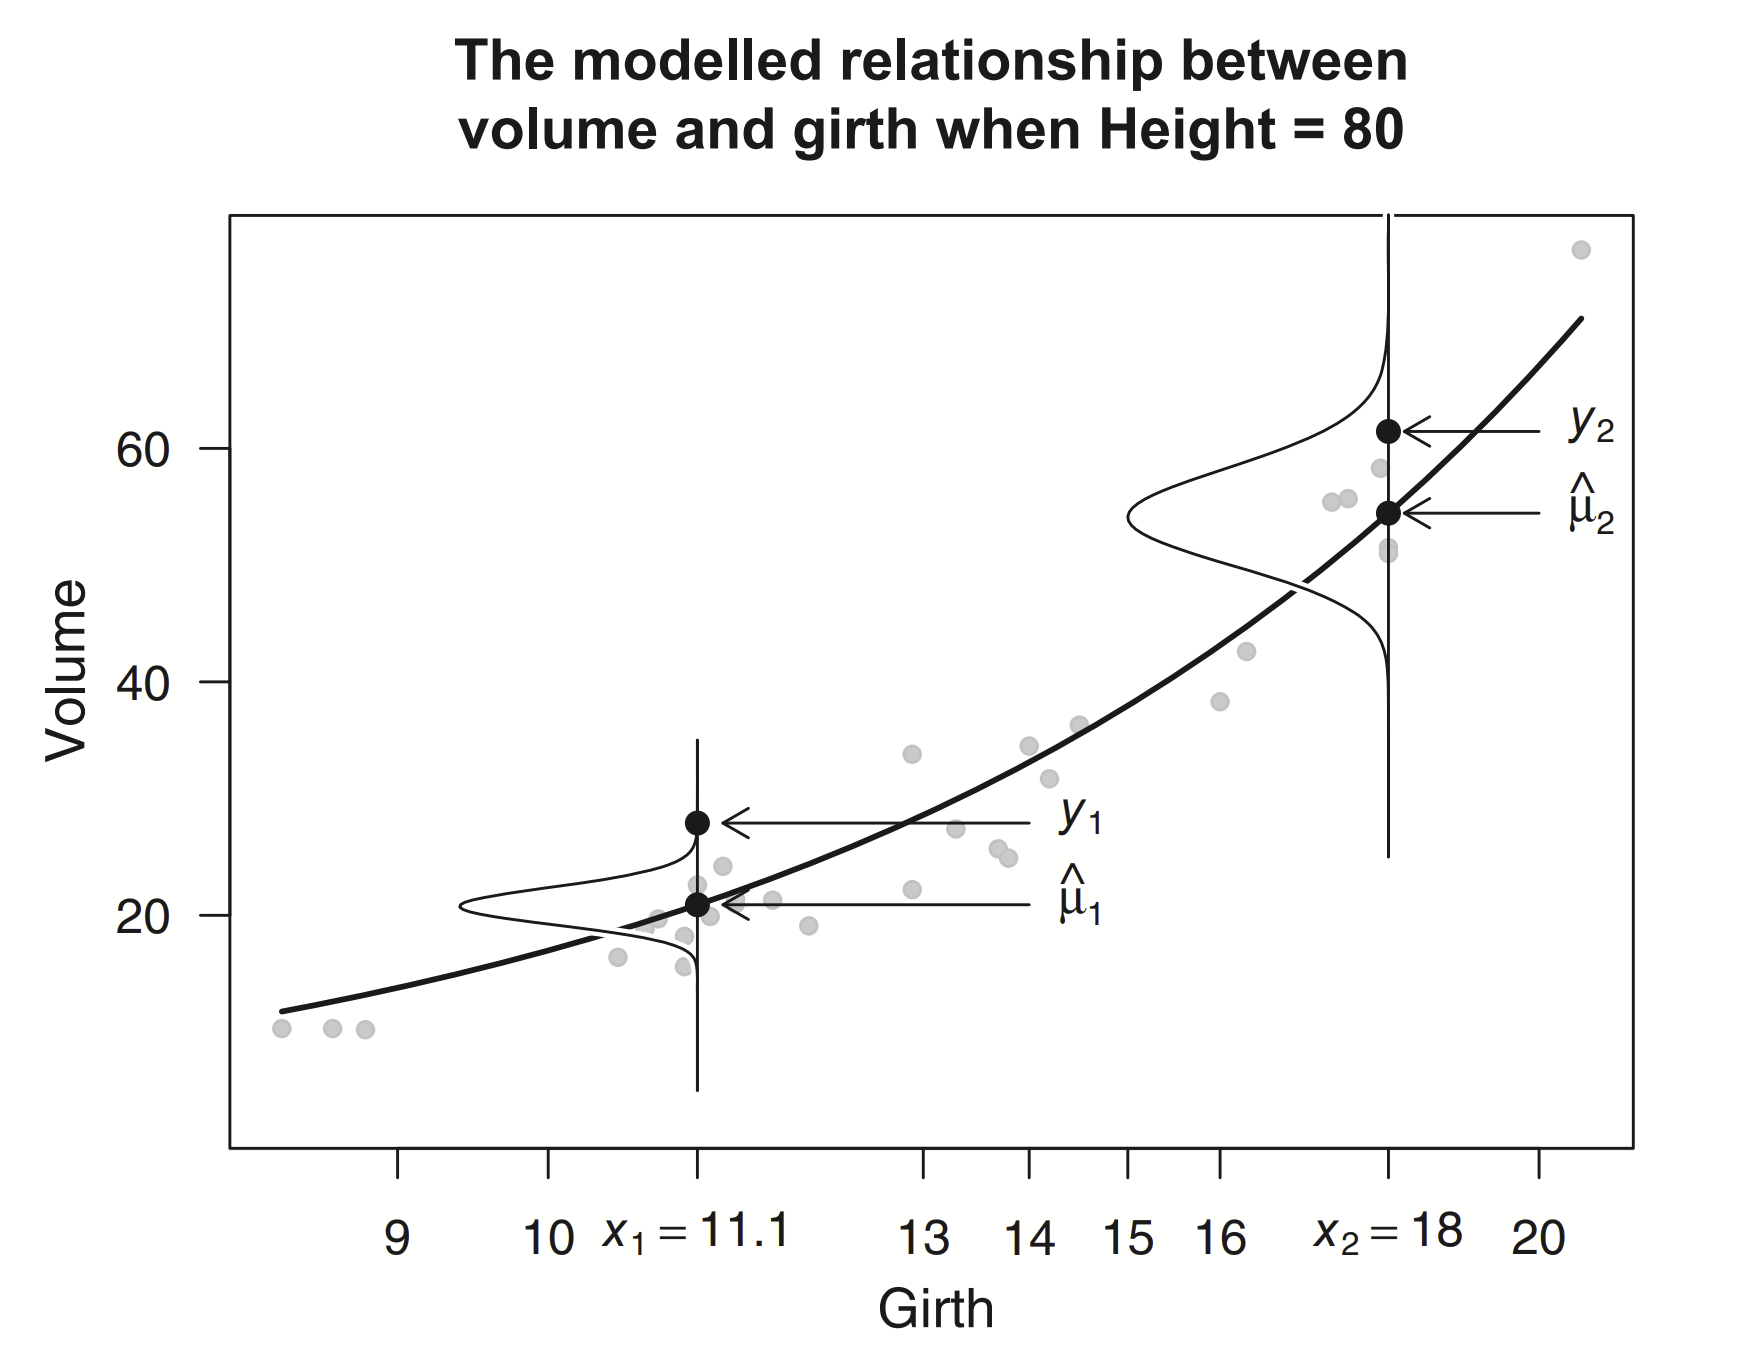







Back to Python

In [ ]:
log_trees

In [ ]:
trees_m2 = smf.glm('Volume ~  Height + Girth', data=log_trees, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(trees_m2.summary())
trees_modeled['fitted2'] = trees_m2.fittedvalues
trees_modeled['r_deviance_std2'] = trees_m2.resid_deviance
trees_modeled['r_pearson_std2'] = trees_m2.resid_pearson
trees_modeled

In [ ]:
ggplot(trees_modeled, aes(x = trees_modeled['fitted2'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")

In [ ]:
ggplot(trees_modeled, aes(x = trees_modeled['Girth'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Girth",
       y = "Deviance standartized residuals")

In [ ]:
ggplot(trees_modeled, aes(x = trees_modeled['Height'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Height",
       y = "Deviance standartized residuals")

We have correct link function, but we still have  problems with  systematic component and residual plots. Lets try some transformations of covariates.

### Model 3 (_m3)

We use log transformation of both $x_j$'s.

In [ ]:
trees_m3 = smf.glm('Volume ~  log_Height + log_Girth', data=log_trees, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(trees_m3.summary())

All covariates are significant in the model.



In [ ]:
fitted3 = trees_m3.fittedvalues
r_deviance_std3 = trees_m3.resid_deviance
r_pearson_std3 = trees_m3.resid_pearson

In [ ]:
ggplot(trees_modeled, aes(x = fitted3, y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")

In [ ]:
ggplot(trees_modeled, aes(x = log_trees['log_Girth'], y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "log(Girth)",
       y = "Deviance standartized residuals")

In [ ]:
ggplot(trees_modeled, aes(x = log_trees['log_Height'], y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "log(Height)",
       y = "Deviance standartized residuals")

Model 3 is sufficient :-)

Lets check AIC statistics for all three models.

In [ ]:
AIC_1 = trees_m1.aic
AIC_2 = trees_m2.aic
AIC_3 = trees_m3.aic
print(AIC_1,AIC_2,AIC_3)

### Question:

* Are residuals from the model 3 normal?

In [ ]:
r_anscombe = trees_m3.resid_anscombe_scaled
print(r_anscombe)

Check normality with test

In [ ]:
stats.kstest(r_anscombe, 'norm')

In [ ]:
stats.shapiro(r_anscombe)

**Cook distance**

Let $\hat\beta_{(-i)}$ denotes estimation of $\beta$ computed without observation  $i$. Cook distance for $i$th observation is defined by
$$CD_i = \frac{1}{p} \left(\hat\beta - \hat\beta_{(-i)}\right)^T X^T W^{-1} X \left(\hat\beta - \hat\beta_{(-i)}\right)$$
but its computed by
$$
CD_i = \frac{1}{p} \left( r_i^{PS}\right)^2 \frac{h_{ii}}{1-h_{ii}}
$$
and observation is influence if
$$
CD_i \ > \ \frac{8}{n-2p}
$$

In [ ]:
influence = trees_m3.get_influence()
cooks = influence.cooks_distance

In [ ]:
influence.plot_influence()

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [ ]:
influence.plot_index()
abline(0, 8/(31-4))
plt.show()

In [ ]:
hatvalues = trees_m3.get_hat_matrix_diag()

In [ ]:
plt.scatter(log_trees.index, hatvalues)
plt.show()

In [ ]:
influence = trees_m3.get_influence()
inf_sum = influence.summary_frame()
inf_sum

## Your Turn during exercise

Problem 8.6. from the book:


The standardized deviance residual $r^{DS}$ is approximately the reduction
in the residual deviance when Observation $i$ is omitted from the data. Demonstrate this by R code using the $trees$ data as follows.

* Fit the model m_1 as

  `data(trees)`
   `model_full <- glm( Volume ~ log(Girth) + log(Height),family=Gamma(link=log), data=trees)`
 Compute the residual deviance, the Pearson estimate of $\phi$, and the standardized deviance residuals from this model.

* Omit Observation 1 from `trees`, and refit the model. Call this model
`model_omit_1`.

* Compute the difference between the residual deviance for the full model
`model_full` and for model `model_omit_1`. Show that this differences divided by the Pearson estimate of $\phi$ is approximately the standardized
deviance residuals squared.

* Repeat the above process for every observation $i$. At each iteration, call this model `model_omit_i`. Then, compute the difference between the deviance for the full model `model_full` and for model `model_omit_i`. Show that these differences divided by $\phi$ are approximately the standardized residuals squared.


## Analyse data of car accidents in Sweeden.

## Your Turn: HW 05

In [ ]:
# Load the R magic extension
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library(tidyverse)

install.packages("statmod")
library(statmod)

install.packages("boot")
library(boot)

install.packages("gridExtra")
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/statmod_1.5.0.tar.gz'
Content type 'application/x-gzip' length 92486 bytes (90 KB)
downloaded 90 KB


The downloaded source packages are in
	‘/tmp/RtmpymGOGo/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/boot_1.3-31.tar.gz'
Content type 'application/x-gzip' length 238458 bytes (232 KB)
downloaded 232 KB


The downloaded source packages are in
	‘/tmp/RtmpymGOGo/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'
Content type 'application/x-gzip' length 1062844 bytes (1.0 MB)
downloaded 1.0 MB


The downloaded source packages are in
	‘/tmp/RtmpymGOGo/downloaded_packages’


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.linalg import sqrtm

In [ ]:
%%R -o cars
sweden2 <- "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/sweden2.csv"
cars    <- read.table(sweden2, header = T, sep = ",")
summary(cars)
head(cars)



  Year Deaths Cars Fuel
1 1955    902  755 1531
2 1956    889  855 1657
3 1957    946  987 1738
4 1958    941 1098 1893
5 1959   1000 1216 2011
6 1960   1036 1324 2127


*Dataset* contains the number of deaths, he number of registered cars, the annual volume of sold fuels, the number of registered vehicles and the year. Our goal will be to create the best possible model for death rates. Since these are the number of events per unit time, we use the Poisson distribution with the *canonical link function*  $g (\mu) = log(\mu) $.

Because the observed period is relatively long and there have been significant changes in transport, we will only consider data from 1975.

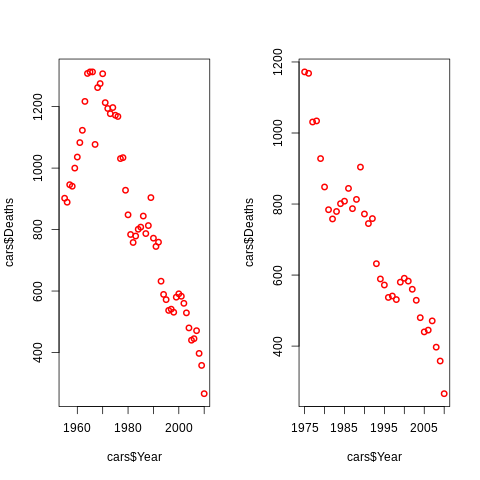

In [ ]:
%%R
par(mfrow=c(1,2))
plot(cars$Deaths~cars$Year, col="red", lwd=2)
cars <- cars[cars$Year>1974,]
plot(cars$Deaths~cars$Year, col="red", lwd=2)

In [ ]:
cars= cars[cars['Year']>1974]
cars.describe()

,Year,Deaths,Cars,Fuel
count,36.000000,36.000000,36.000000,36.000000
mean,1992.500000,689.916667,3891.666667,5264.250000
std,10.535654,220.272866,622.931640,422.352958
min,1975.000000,266.000000,2931.000000,4383.000000
25%,1983.750000,535.500000,3284.250000,4896.000000
50%,1992.500000,688.500000,3918.500000,5392.500000
75%,2001.250000,809.250000,4438.000000,5580.250000
max,2010.000000,1172.000000,4884.000000,5910.000000


# INITIAL ANALYSIS

In [ ]:
print("\nMissing values:\n", cars.isnull().sum())


Missing values:
 Year      0
Deaths    0
Cars      0
Fuel      0
dtype: int64


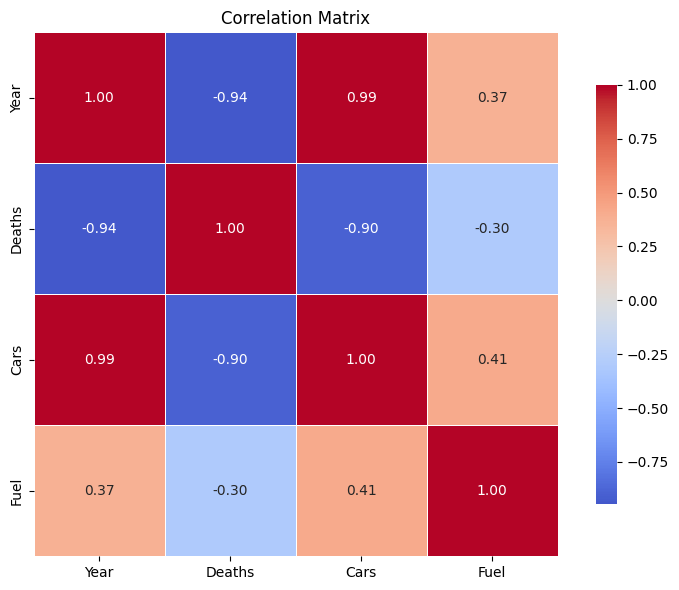

In [ ]:
# Compute correlation matrix
corr = cars.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

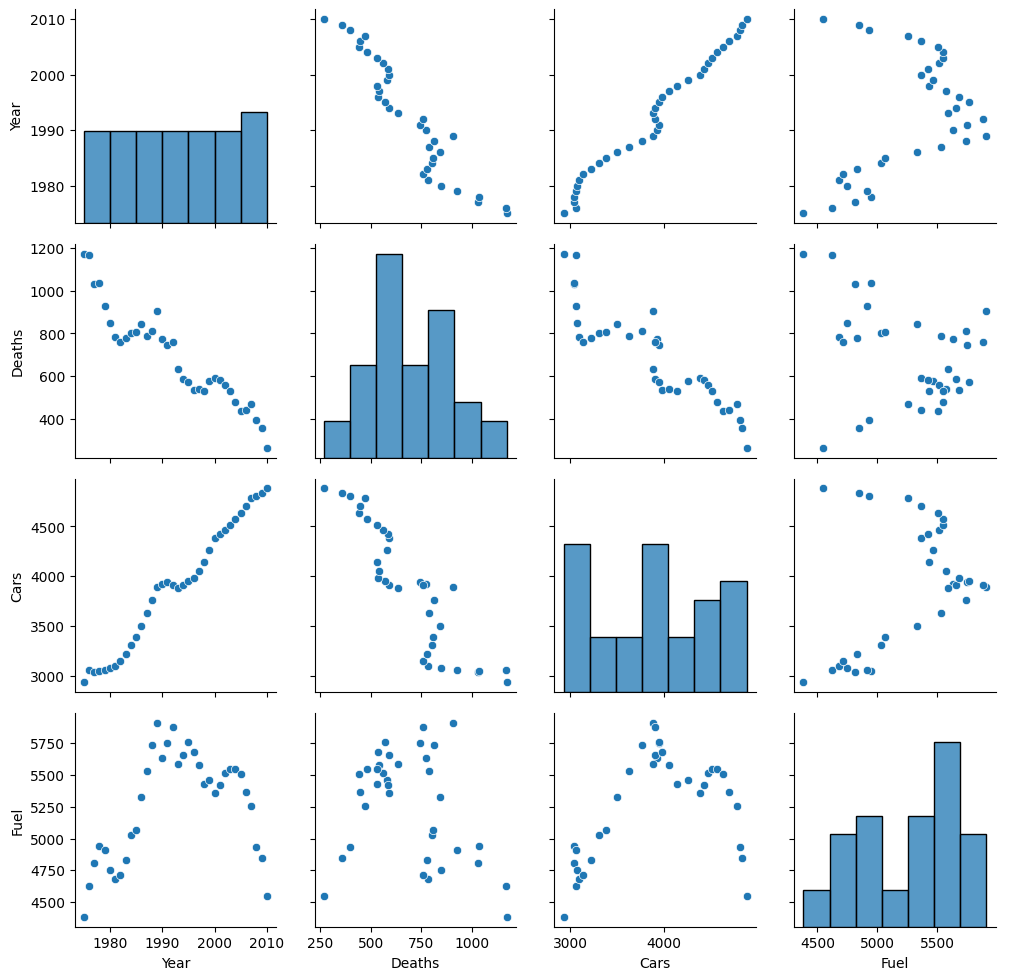

In [ ]:
g = sns.PairGrid(cars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Tasks

* Find the best posssible model. Try add all varariables up to the second order interactions. You can use `step()` function based on `AIC`.
* Analyse residuals and check systematic components.
* If incorrect linear predictor appears, try to transform corresponding variable. Hint: `Fuel_transformed <- log(abs(Fuel-mean(Fuel)))`
* Run post hoc analysis of your final model again
* Find influence observations and decide how to cope with them (if any)
* Hide last 5 observations, train the model using remaining and try to predict response for the 5 hidden latest observations. Plot predictiions together with true observations.


In [ ]:
# Define the initial model formula with all variables and second-order interactions
formula ="Deaths ~ Year + Cars*Fuel +  Year:Cars + Year:Fuel"

# Fit the initial model using Poisson with log link
model_full = smf.glm(formula=formula, data=cars, family=sm.families.Poisson(link=sm.families.links.log())).fit()

print(model_full.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       29
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -178.85
Date:                Wed, 09 Apr 2025   Deviance:                       58.102
Time:                        08:28:17   Pearson chi2:                     58.1
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    266.3051     90.421      2.945      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [ ]:
%%R
# Use step() to find the best model based on AIC
model_0 <- glm( Deaths~1, data=cars, family=poisson(link="log"))
model_1 <- glm( Deaths ~ Year + Cars*Fuel +  Year:Cars + Year:Fuel, data=cars, family=poisson(link="log"))
model_aic <- step(model_0, scope=list(lower=model_0, upper=model_1), direction="both")
model_aic

Start:  AIC=2775
Deaths ~ 1

       Df Deviance     AIC
+ Year  1   257.45  561.05
+ Cars  1   476.39  779.99
+ Fuel  1  2248.40 2552.00
<none>     2473.39 2775.00

Step:  AIC=561.05
Deaths ~ Year

       Df Deviance     AIC
+ Cars  1    99.58  405.19
+ Fuel  1   188.56  494.16
<none>      257.45  561.05
- Year  1  2473.39 2775.00

Step:  AIC=405.19
Deaths ~ Year + Cars

            Df Deviance    AIC
+ Fuel       1    81.90 389.51
+ Year:Cars  1    87.47 395.08
<none>            99.58 405.19
- Cars       1   257.45 561.05
- Year       1   476.39 779.99

Step:  AIC=389.51
Deaths ~ Year + Cars + Fuel

            Df Deviance    AIC
+ Year:Fuel  1    58.30 367.91
+ Cars:Fuel  1    59.92 369.52
<none>            81.90 389.51
+ Year:Cars  1    80.92 390.53
- Fuel       1    99.58 405.19
- Cars       1   188.56 494.16
- Year       1   398.14 703.74

Step:  AIC=367.91
Deaths ~ Year + Cars + Fuel + Year:Fuel

            Df Deviance    AIC
<none>           58.303 367.91
+ Year:Cars  1   58.15

In [ ]:
# Use step() to find the best model based on AIC
model_best = smf.glm(formula='Deaths ~ Year + Cars + Fuel + Year:Fuel', data=cars, family=sm.families.Poisson(link=sm.families.links.log())).fit()

# Print the summary of the final model
print(model_best.summary())

print("Model AIC:", model_best.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       31
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -178.95
Date:                Wed, 09 Apr 2025   Deviance:                       58.303
Time:                        08:28:18   Pearson chi2:                     58.3
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    251.1065     21.622     11.614      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(



Call:
glm(formula = Deaths ~ Year + Cars + Fuel + Year:Fuel, family = poisson(link = "log"), 
    data = cars)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.511e+02  2.162e+01  11.614  < 2e-16 ***
Year        -1.246e-01  1.092e-02 -11.408  < 2e-16 ***
Cars         7.577e-04  7.415e-05  10.219  < 2e-16 ***
Fuel        -1.942e-02  4.026e-03  -4.823 1.41e-06 ***
Year:Fuel    9.804e-06  2.025e-06   4.842 1.29e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2473.393  on 35  degrees of freedom
Residual deviance:   58.303  on 31  degrees of freedom
AIC: 367.91

Number of Fisher Scoring iterations: 3



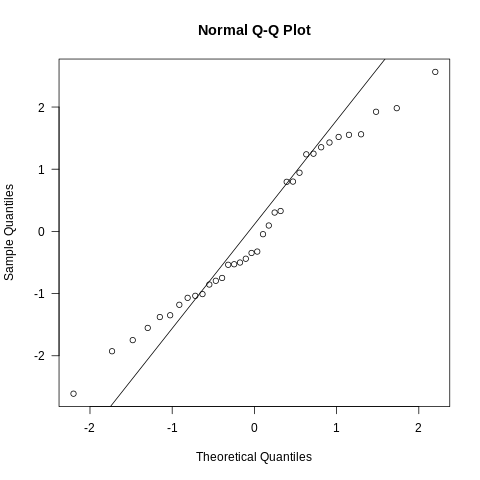

In [ ]:
%%R
m1 <- glm(Deaths ~ Year + Cars + Fuel + Year:Fuel, data=cars, family=poisson(link="log"))
qr.m1 <- qresid(m1)
qqnorm(qr.m1, las=1 )
qqline(qr.m1)
print(summary(m1))

In [ ]:

def residuals_table(model):
  y = model.model.endog
  fittedvalues = list(model.fittedvalues)

  final_df = pd.DataFrame({'predicted':fittedvalues})
  final_df['observed'] = y

  mu = final_df['predicted']

  # variance function for Poisson distribution is linear function of expectation
  v = mu

  #derivative of the link function is the inverse function
  der_g = 1/mu

  # working residuals:
  work = (y - mu)*der_g
  final_df['working_res'] = work
  # Pearson residuals:
  pears = (y - mu)/(np.sqrt(v))
  final_df['pearson_res'] = pears

  # Deviance residuals:

    # Handle cases where y = 0 to avoid log(0)
  log_term = np.where(y == 0, 0, y * np.log(y / mu))

  devi = np.sign(y - mu) * np.sqrt(2 * (log_term - (y - mu)))

  final_df['deviance_res'] = devi

  # dispersion for residual normalization
  phi_hat = 1

  #define the weight matrix
  W = np.diag(1/(v*(der_g**2)))

  #define the regressor matrix
  X = model.model.exog

  H = sqrtm(W)@X@(np.linalg.inv(X.T@W@X))@X.T@sqrtm(W)

  # Diagonal elements of the projection matrix H (h_i)
  h = np.diagonal(H)

  leverage = [H[i,i] for i in range (0,len(y))]
  final_df['leverage'] = leverage

    # Standardized Pearson residuals:
  std_p = pears / (np.sqrt(1 - h)*np.sqrt(phi_hat))
  final_df['pearson_res_std'] = std_p

  # Standardized Deviance residuals:
  std_d = devi / (np.sqrt(1 - h)*np.sqrt(phi_hat))
  final_df['deviance_res_std'] = std_d


  return final_df

In [ ]:
def plot_diagnostics(model):
  res_df = residuals_table(model)
  X = model.model.exog         # Regressor matrix

  ##### Deviance residuals ######

  # Number of regressors (excluding intercept)
  n_vars = len(model.model.exog_names) - 1  # assuming intercept is at index 0

  # Total plots: one for each regressor + 1 for fitted values
  n_plots = n_vars + 1

  # Setup subplots
  n_cols = int(np.ceil(n_plots / 2))
  fig, axes = plt.subplots(2, n_cols, figsize=(5 * n_cols, 8))
  axes = axes.flatten()  # Make it easier to index linearly

  # Plot for each regressor
  for j in range(1, len(model.model.exog_names)):  # skip intercept at index 0
      ax = axes[j - 1]
      sns.regplot(
          x=X[:, j],
          y=res_df['deviance_res_std'],
          ci=95,
          line_kws={'color': 'red'},
          ax=ax
      )
      ax.set_title(f'Standardized residuals vs {model.model.exog_names[j]}')

  # Plot for fitted values
  sns.regplot(
      x=res_df['predicted'],
      y=res_df['deviance_res_std'],
      ci=95,
      line_kws={'color': 'red'},
      ax=axes[n_vars]
  )
  axes[n_vars].set_title('Standardized residuals vs Fitted values')

  plt.tight_layout()
  plt.show()

  ##### working responses #####
  nu = model.predict(linear=True)
  working_responses = nu+res_df['working_res']

  # Create scatterplot
  plt.scatter(nu, working_responses, label='Data Points', color='blue')

  # Plot a line with slope=1 (y = x)
  x_line = np.linspace(min(nu), max(nu), 100)
  plt.plot(x_line, x_line, color='red', linestyle='--', label='y = x (slope=1)')

  # Add labels and legend
  plt.title('Scatterplot of working responses vs fitted linear predictions')
  plt.legend()
  plt.axis('equal')

  ##### partial residual plot #####
  beta_hat = model.params      # Estimated coefficients

  fig, axes = plt.subplots(1, 3, figsize=(12, 5))


  for j in range(0,3):
    partial_res = beta_hat[j+1] * X[:, j+1] + res_df['working_res']

    sns.scatterplot (x=X[:, j+1], y=partial_res, ax=axes[j])
    axes[j].set_title(f'Partial residual plot for {model.model.exog_names[j+1]}')
    # Plot a line with slope=1 (y = x)
    x_line = np.linspace(min(X[:, j+1]), max(X[:, j+1]), 100)
    axes[j].plot(x_line, beta_hat[j+1]*x_line, color='red', linestyle='--')

  plt.tight_layout()
  plt.show()


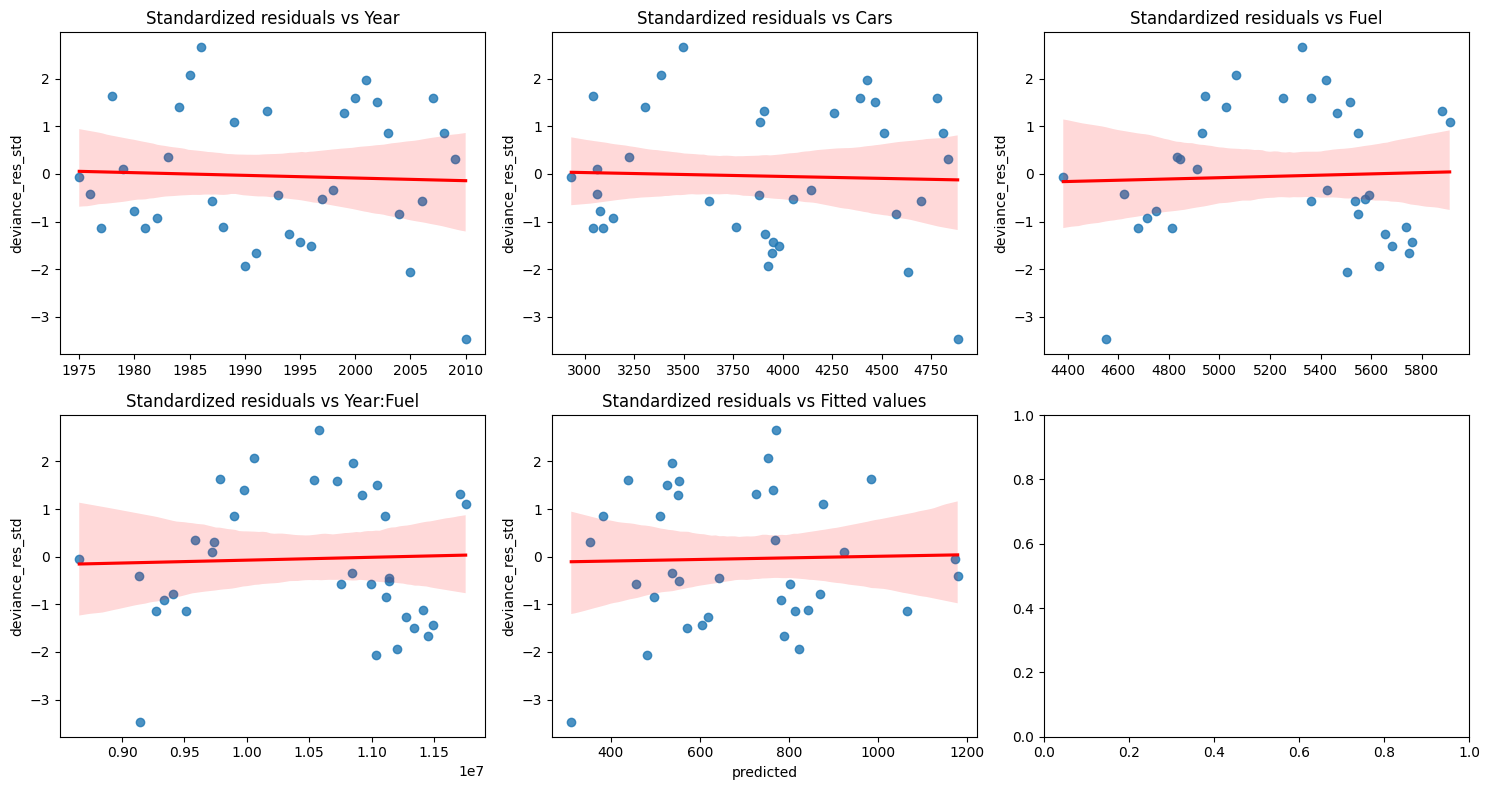

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:985: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)
<ipython-input-74-5c9911e0b4dd>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partial_res = beta_hat[j+1] * X[:, j+1] + res_df['working_res']
<ipython-input-74-5c9911e0b4dd>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[j].plot(x_line, beta_hat[j+1]*x_line, color='red', linestyle='--')
<ipython-input-74-5c9911e0b4dd>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

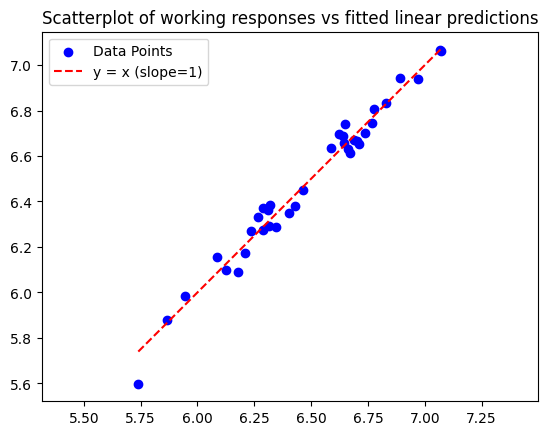

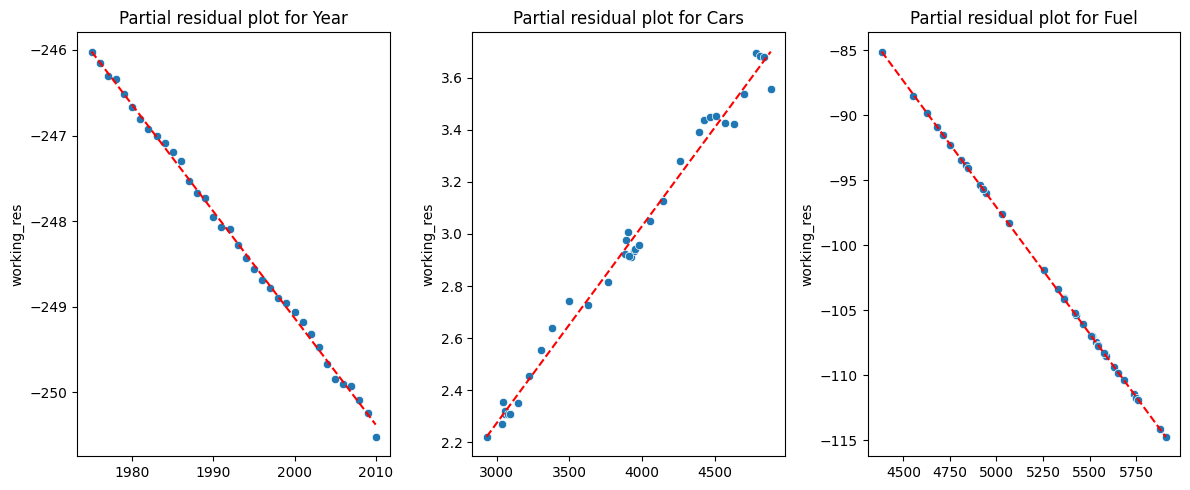

In [ ]:
plot_diagnostics(model_best)

Although the partial regression plots seem relatively satisfactory. The working response plot and especially the deviance residual vs fuel plot are a bit scary. So we try to add the proposed transformation.

In [ ]:
# Transform the 'Fuel' variable as suggested
cars['Fuel_transformed'] = np.log(np.abs(cars['Fuel'] - np.mean(cars['Fuel'])))

# Redefine the model formula with the transformed variable, we have two candidate models
formula_transformed = "Deaths ~ Year + Cars+ Fuel_transformed + Year:Fuel_transformed"
formula_add_transform = "Deaths ~ Year + Cars+ Fuel+ Fuel_transformed + Year:Fuel"

# Fit the model with the transformed variable
model_transformed = smf.glm(formula=formula_transformed, data=cars, family=sm.families.Poisson(link=sm.families.links.log())).fit()
model_add_transform= smf.glm(formula=formula_add_transform, data=cars, family=sm.families.Poisson(link=sm.families.links.log())).fit()

# Print the summary of the transformed model
print(model_transformed.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       31
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -190.45
Date:                Wed, 09 Apr 2025   Deviance:                       81.297
Time:                        08:28:20   Pearson chi2:                     79.4
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               169.31

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


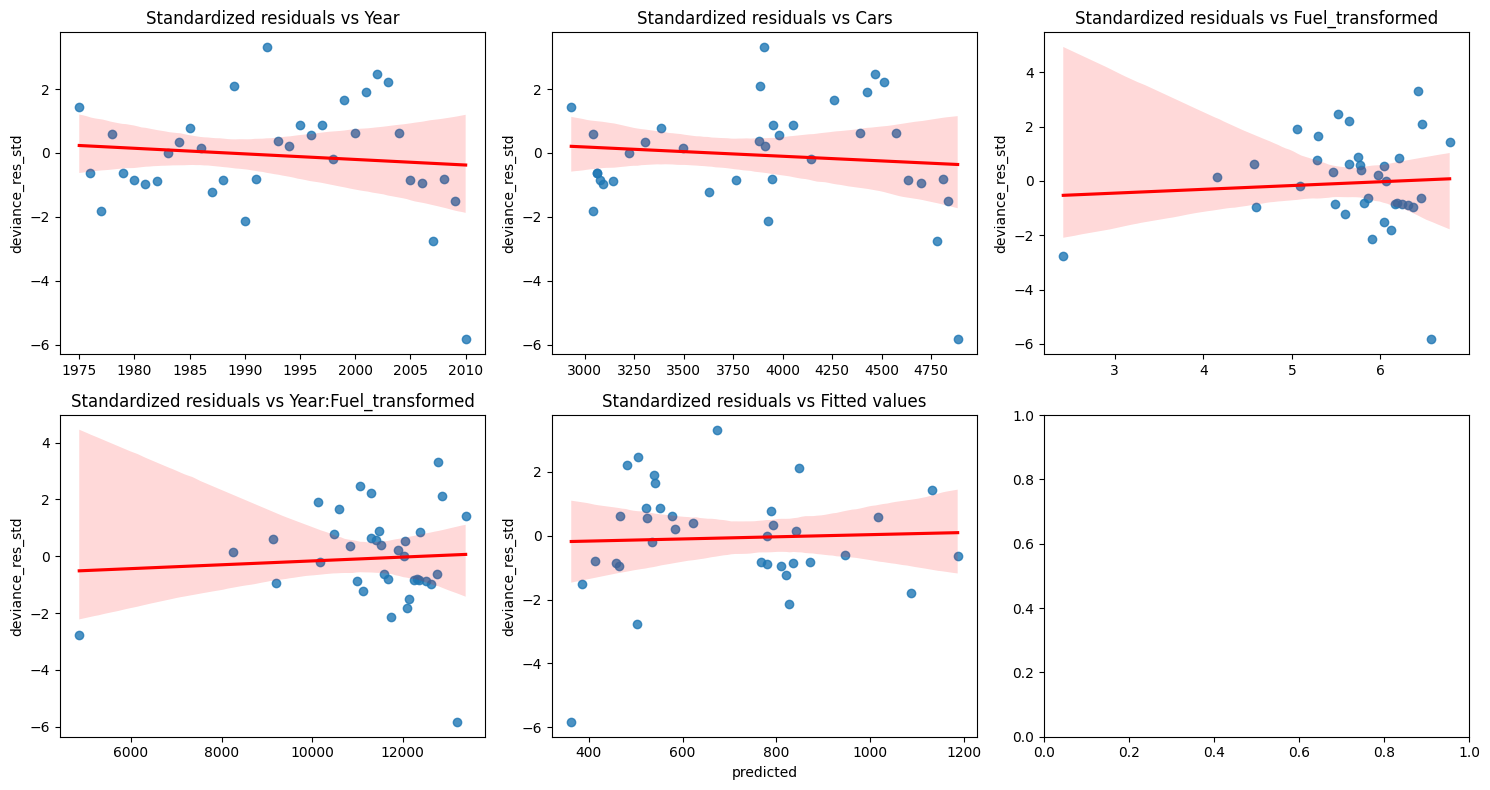

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:985: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)
<ipython-input-74-5c9911e0b4dd>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partial_res = beta_hat[j+1] * X[:, j+1] + res_df['working_res']
<ipython-input-74-5c9911e0b4dd>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[j].plot(x_line, beta_hat[j+1]*x_line, color='red', linestyle='--')
<ipython-input-74-5c9911e0b4dd>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

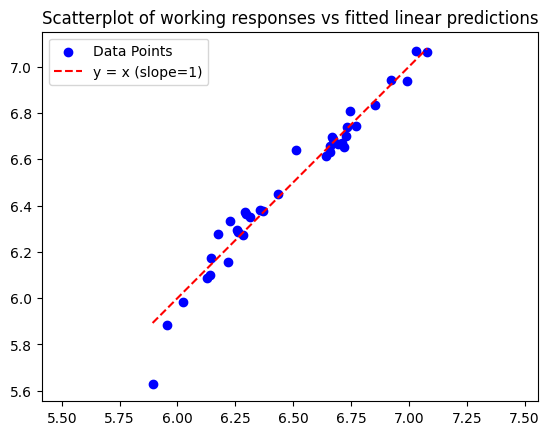

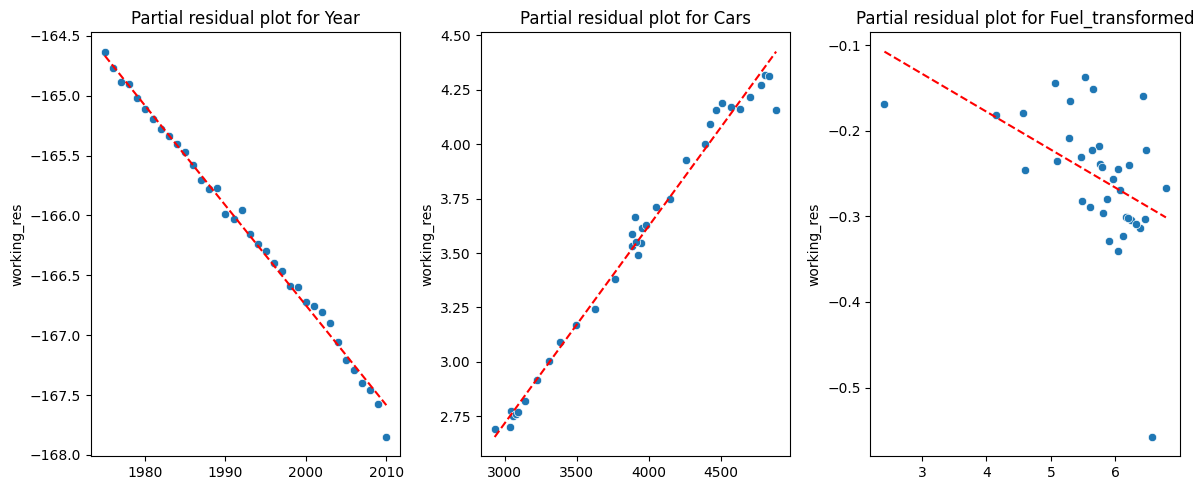

In [ ]:
plot_diagnostics(model_transformed)


This model is definitely not the way to go...

In [ ]:
print(model_add_transform.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -169.68
Date:                Wed, 09 Apr 2025   Deviance:                       39.759
Time:                        08:28:22   Pearson chi2:                     39.8
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          260.1512     21.911  

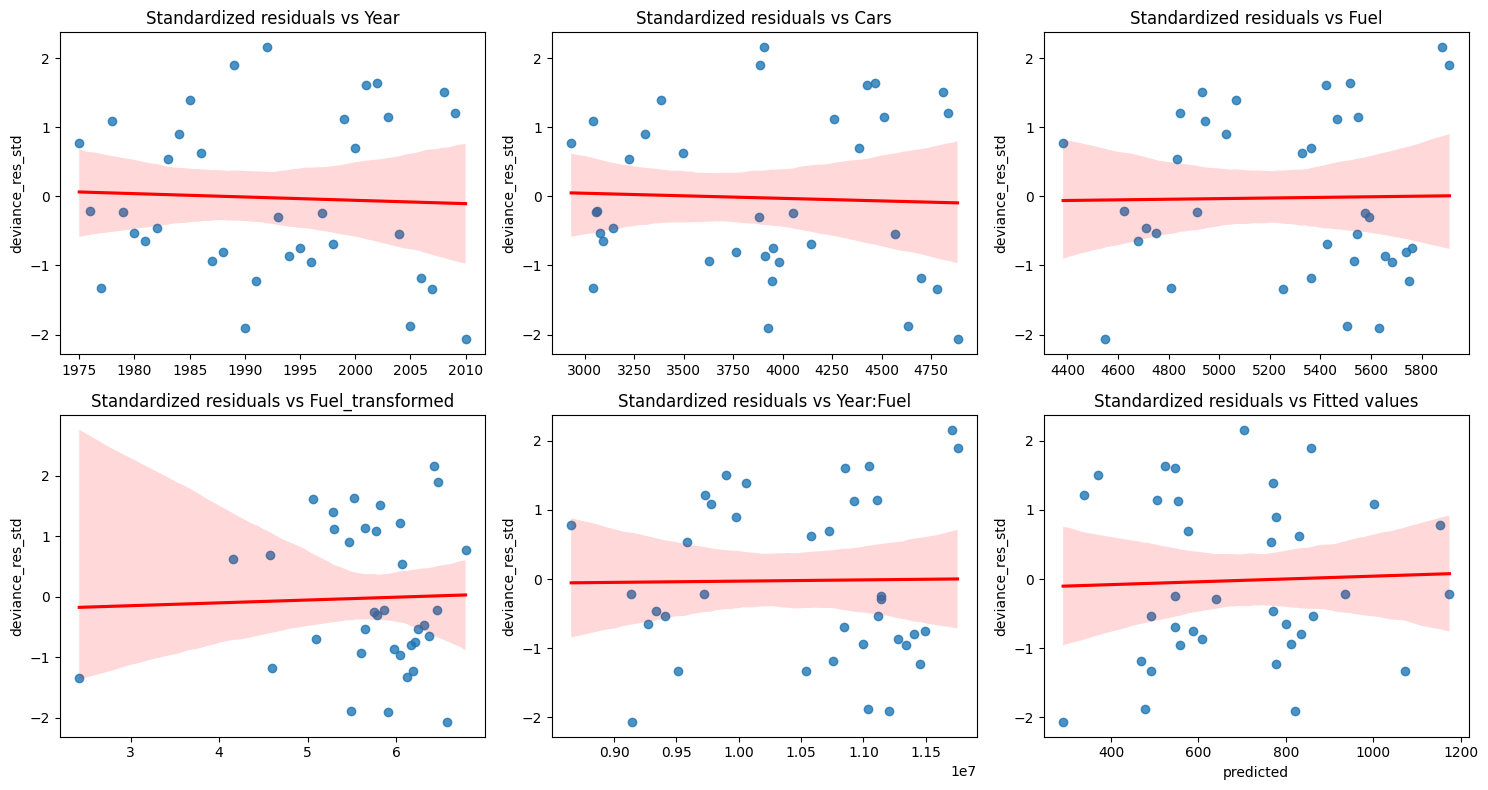

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:985: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)
<ipython-input-74-5c9911e0b4dd>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partial_res = beta_hat[j+1] * X[:, j+1] + res_df['working_res']
<ipython-input-74-5c9911e0b4dd>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[j].plot(x_line, beta_hat[j+1]*x_line, color='red', linestyle='--')
<ipython-input-74-5c9911e0b4dd>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

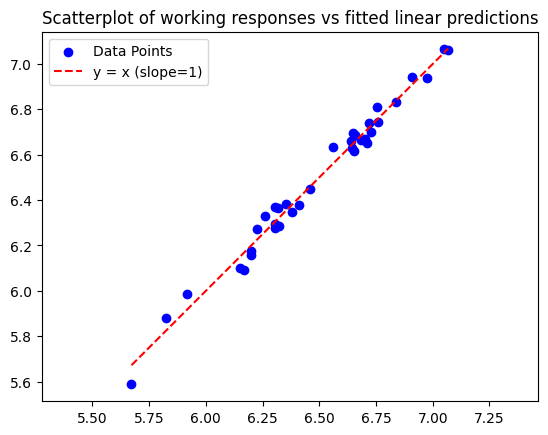

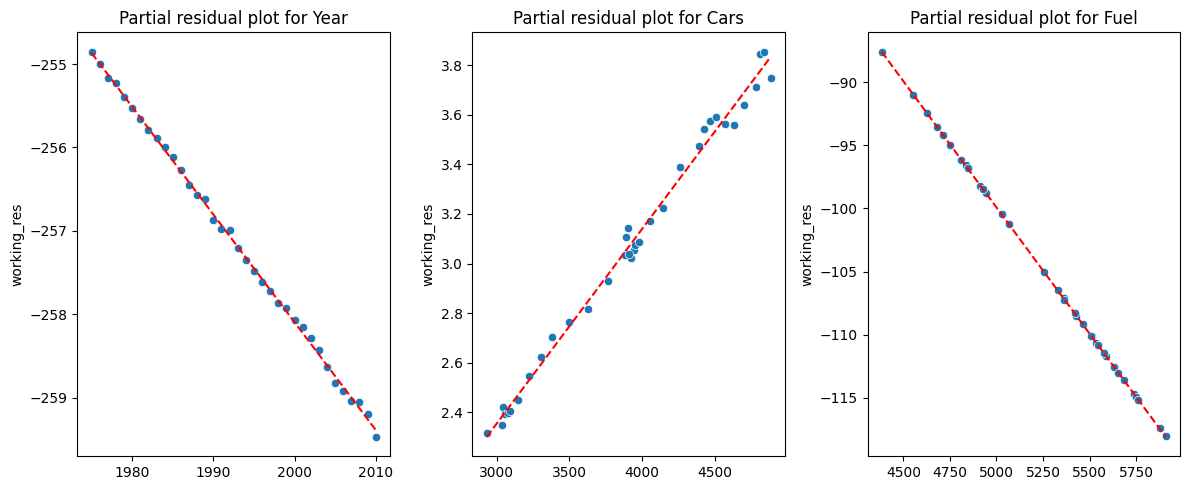

In [ ]:
plot_diagnostics(model_add_transform)

This model, on the other hand is sufficient, so we finally stick with this one.

In [ ]:
# influence analysis

influence = model_add_transform.get_influence()
cooks = influence.cooks_distance

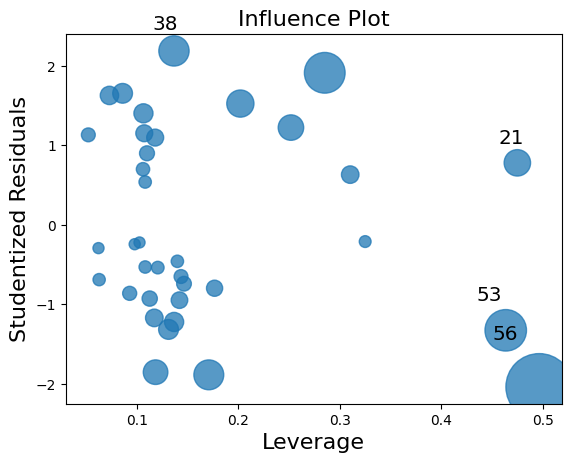

In [ ]:
influence.plot_influence()
plt.show()

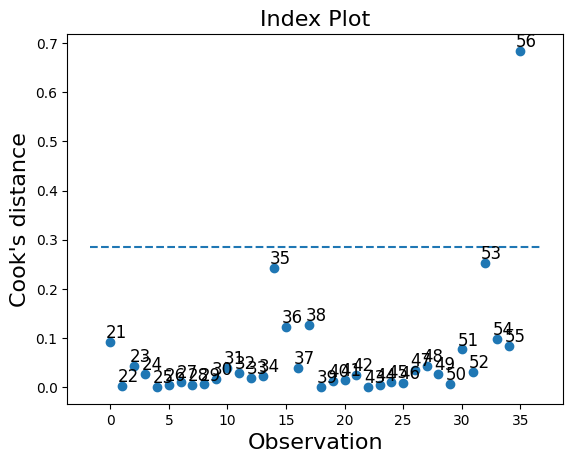

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

influence.plot_index()
abline(0, 8/(36-8))
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


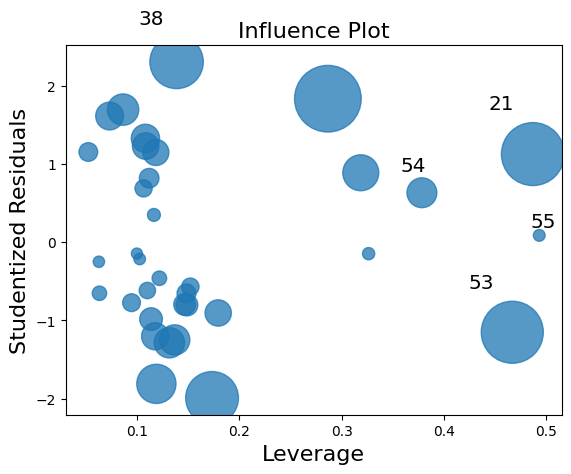

In [ ]:
cars_filtered = cars.drop(cars.index[35])

model_add_transform_filtered = smf.glm(formula=formula_add_transform, data=cars_filtered, family=sm.families.Poisson(link=sm.families.links.log())).fit()

influence = model_add_transform_filtered.get_influence()
cooks = influence.cooks_distance

influence.plot_influence()
plt.show()

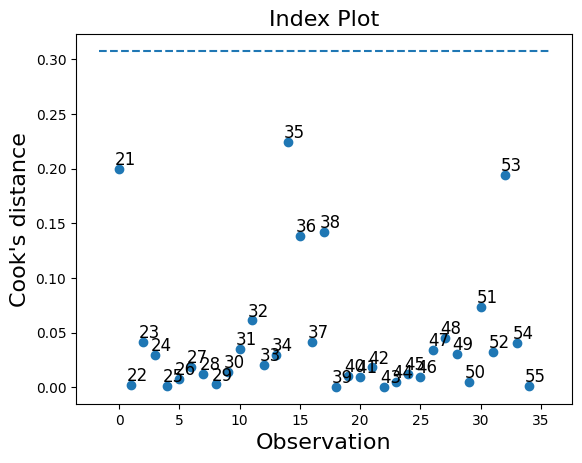

In [ ]:
influence.plot_index()
abline(0, 8/(34-8))
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


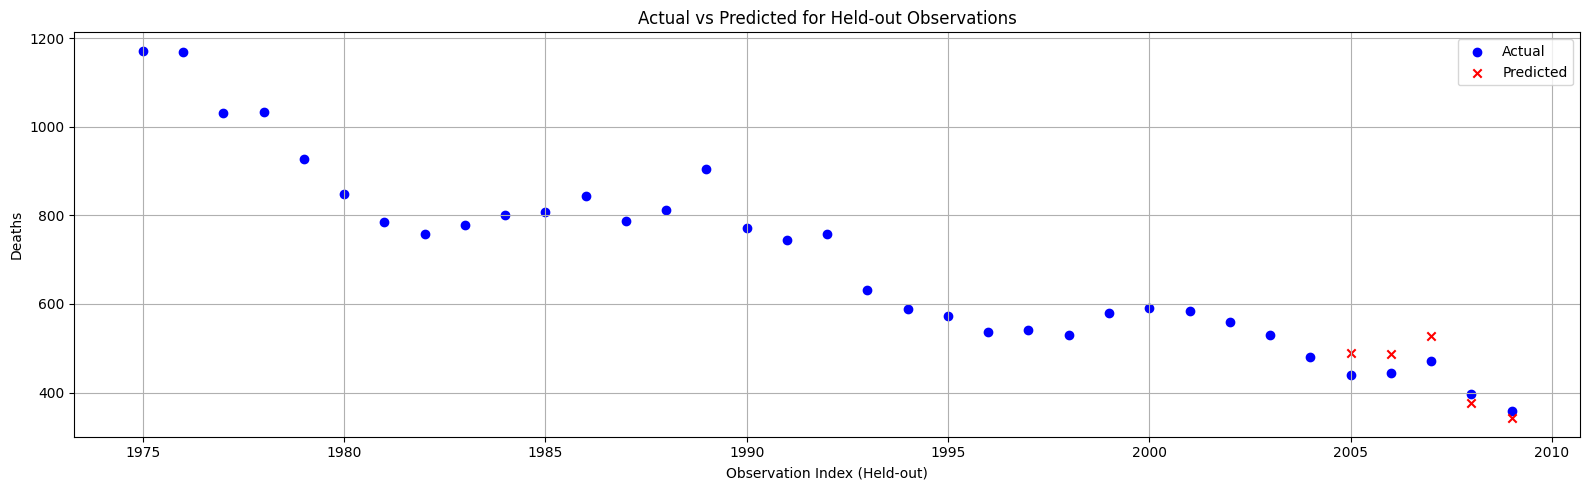

In [ ]:
# now exclude last 5 observations, fit the model on the rest and predict

held_out = cars_filtered[-5:]
train_data = cars_filtered.drop(held_out.index)

# Fit the GLM model on the training data
model_add_transform_filtered = smf.glm(
    formula=formula_add_transform,
    data=train_data,
    family=sm.families.Poisson(link=sm.families.links.log())
).fit()

# Predict on the held-out observations
held_out = held_out.copy()
held_out['prediction'] = model_add_transform_filtered.predict(held_out)

# Plot actual vs. predicted values
plt.figure(figsize=(16, 5))
x_vals = held_out['Year'] #.index


plt.scatter(cars_filtered['Year'], cars_filtered[model_add_transform_filtered.model.endog_names], label='Actual', color='blue')
#plt.scatter(x_vals, held_out[model_add_transform_filtered.model.endog_names], label='Actual', color='blue')
plt.scatter(x_vals, held_out['prediction'], label='Predicted', color='red', marker='x')

plt.title('Actual vs Predicted for Held-out Observations')
plt.xlabel('Observation Index (Held-out)')
plt.ylabel(model_add_transform_filtered.model.endog_names)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()